# Dimensionality Reduction

### Introduction

In this section, I will be performing dimensionality reduction on the NBA combine dataset without label features. Dimensionality reduction is a tool used in data analysis and machine learning to address the challenges posed by high-dimensional datasets. Dimensionality reduction methods aim to capture the essential information contained in the original dataset while reducing the number of features. By transforming the data into a lower-dimensional representation, these techniques can enhance computational efficiency, alleviate the curse of dimensionality, and can reveal underlying patterns or structures in the data. I will be performing dimensionality reduction using PCA and t-SNE in python. PCA (Principal Component Analysis) is a statistical technique that reduces the dimensionality of high-dimensional datasets by identifying principal components through linear transformations, generating a low-dimensional representation useful for both supervised learning and data visualization. t-SNE (T-distributed Stochastic Neighbor Embedding) is a non-linear dimensionality reduction technique that visualizes high-dimensional data in a lower-dimensional space by employing a probability distribution to group similar data points together while maintaining separation between dissimilar points. By performing dimensionality reduction using both techniques, I hope to gain insights on if combine measurements can be effectively predicted, retained, and shown with reduced dimensions, and if any future insights on other combine measurements can be related to vertical jump. 

## Dimensionality Reduction with PCA

For Dimensionality Reduction with PCA, I first examined the eigenvalues of each feature to understand their individual contributions. Subsequently, I visualized the number of principal components against cumulative explained variance to determine the optimal number of components needed for a comprehensive representation of the data. Following this exploration, I performed PCA and created a graphical representation of the top two principal components, with 'above_max_vert_mean' assigned as the color variable. 

In [193]:
#| code-fold: true
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import linalg as LA
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import PCA

combine_df = pd.read_csv("../../data/01-modified-data/ccleaned_NBA_combine_no_NA.csv")


label_vec = combine_df["above_max_vert_mean"]
drop_cols = ["Unnamed: 0", "POS", "combine_year", "Name", 'above_max_vert_mean']
feature_matrix = combine_df.drop(columns= drop_cols)
feature_cols = feature_matrix.columns.tolist()



In [194]:
#| code-fold: true
cov_matrix = feature_matrix.cov()
w, v1 = LA.eig(cov_matrix)

print("\nCOV EIGENVALUES:")
eigenvalues = pd.Series(w, index=feature_cols)
print(eigenvalues)






COV EIGENVALUES:
HEIGHT                   5.962825e+02
WEIGHT                   3.982590e+01
BMI                      3.156009e+01
BODY.FAT                 1.208829e+01
STANDING.REACH           3.049225e+00
WINGSPAN                 2.534890e+00
HAND.LENGTH              2.255447e+00
HAND.WIDTH               8.691960e-01
STANDING.VERTICAL        3.467110e-01
MAX.VERTICAL             2.123330e-01
LANE.AGILITY             7.489119e-02
SHUTTLE.RUN              2.317702e-02
THREE.QUARTER.SPRINT     1.325364e-02
BENCH.PRESS              6.936166e-03
WINGSPAN.HEIGHT.RATIO    1.428815e-06
STANDING.TOUCH          -2.603432e-15
MAX.TOUCH               -1.149081e-14
dtype: float64


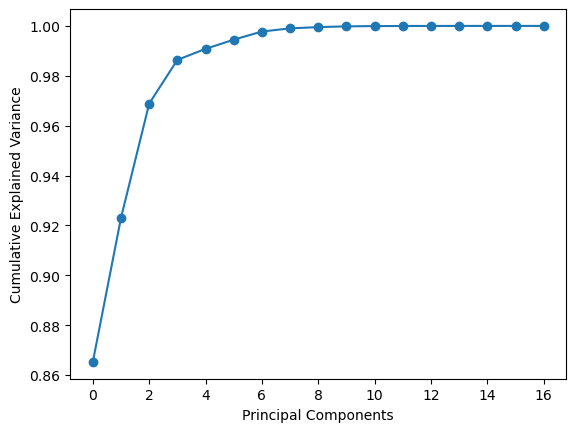

In [195]:
#| code-fold: true
X= feature_matrix
pca = PCA()
pca.fit(X)  
cum_variance = pca.explained_variance_ratio_.cumsum()

plt.plot(cum_variance, marker='o')
plt.xlabel('Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

/Users/tyler/anaconda3/lib/python3.10/site-packages/numpy/core/fromnumeric.py:84: FutureWarning:

In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'



Text(0, 0.5, 'Principal Component 2')

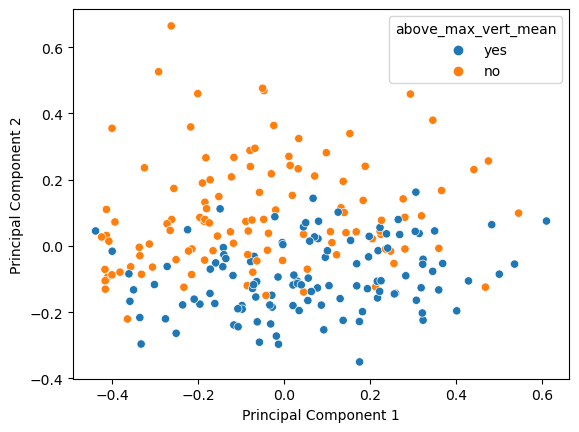

In [197]:
#| code-fold: true
import seaborn as sns
X= feature_matrix
Y= label_vec


X=X/np.max(X) 


from sklearn.decomposition import PCA
n_components=3
pca = PCA(n_components=n_components)

X1=pca.fit_transform(X)
pca_df = pd.DataFrame(X1, columns=['x','y','z'])
pca_df['above_max_vert_mean'] = combine_df['above_max_vert_mean']
pca_df['above_max_vert_mean'] = pca_df['above_max_vert_mean'].map({1: 'yes', 0: 'no'})
sns.scatterplot(data=pca_df, x='x', y='y', hue='above_max_vert_mean')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')



### Analysis

For the analysis PCA, it becomes apparent that 'Height' and 'Weight' exhibited the highest eigenvalues, suggesting their significance in capturing variance within the dataset. The graph illustrating the cumulative explained variance highlighted that the optimal number of principal components was three as it would sufficiently capture the majority of the dataset's variability. Upon plotting the top two PCA components with 'above_max_vert_mean' as the color indicator, Principle Component 2 emerged as particularly informative. Notably, it effectively distinguished patterns based on the 'above_max_vert_mean' variable. Points (players) with a Principal Component 2 value of -0.1 or lower tended to exhibit an above-average max vertical jump, while those above this threshold generally had a below-average max vertical jump, with some overlap.

## Dimensionality Reduction with t-SNE

For Dimensionality Reduction with t-SNE, I leveraged Plotly for visualization, assigning the 'above_max_vert_mean' variable as the color and showcasing 'max vert' and 'name' as hover information. I systematically explored the impact of varying perplexity values, specifically examining settings at 1, 30, and 50.

In [198]:
#| code-fold: true
from sklearn.manifold import TSNE
import seaborn as sns
import plotly.express as px
import textwrap
mywrap = lambda x: textwrap.wrap(x, width=60)

X = feature_matrix
X_embedded = TSNE(n_components=2, learning_rate='auto',init='random', perplexity=1).fit_transform(X)
tsne_df = pd.DataFrame(X_embedded, columns=['x','y'])
tsne_df['Name'] = combine_df['Name'] 
tsne_df['MAX.VERTICAL'] = combine_df['MAX.VERTICAL']
tsne_df['above_max_vert_mean'] = combine_df['above_max_vert_mean']
tsne_df['above_max_vert_mean'] = tsne_df['above_max_vert_mean'].map({1: 'yes', 0: 'no'})
tsne_df['Name'] = tsne_df['Name'].apply(lambda x: x if type(x) == str else '')
tsne_df['Name'] = tsne_df['Name'].apply(lambda x: '<br>'.join(mywrap(x)))
print(tsne_df)
fig = px.scatter(tsne_df, x='x', y='y', hover_data=['Name', 'MAX.VERTICAL'], color = 'above_max_vert_mean')
fig.update_layout(title_text='t-SNE with perplexity = 1')
fig.show()

             x          y               Name  MAX.VERTICAL above_max_vert_mean
0   -15.465197  14.879143      Darius Bazley          37.0                 yes
1   -12.802845  -0.848919        Jordan Bone          42.5                 yes
2    19.057974 -10.679698     Brian Bowen II          35.5                  no
3     0.229881 -49.098835          Ky Bowman          33.0                  no
4    16.030859  47.432117   Ignas Brazdeikis          36.5                 yes
..         ...        ...                ...           ...                 ...
222   2.905999  16.738895  James Southerland          32.0                  no
223  63.500896   0.325026      Adonis Thomas          40.5                 yes
224   1.432116  15.660797     Deshaun Thomas          32.0                  no
225  43.888191  41.715740        Jeff Withey          29.0                  no
226 -20.255779 -58.241734        Cody Zeller          37.5                 yes

[227 rows x 5 columns]


Screenshot of plottly graph, as it would not render in quarto
![](images/tsne1.png)

In [221]:
#| code-fold: true
from sklearn.manifold import TSNE
import seaborn as sns
import plotly.express as px
import textwrap
mywrap = lambda x: textwrap.wrap(x, width=60)

X = feature_matrix
X_embedded = TSNE(n_components=2, learning_rate='auto',init='random', perplexity=30).fit_transform(X)
tsne_df = pd.DataFrame(X_embedded, columns=['x','y'])
tsne_df['Name'] = combine_df['Name'] 
tsne_df['MAX.VERTICAL'] = combine_df['MAX.VERTICAL']
tsne_df['above_max_vert_mean'] = combine_df['above_max_vert_mean']
tsne_df['above_max_vert_mean'] = tsne_df['above_max_vert_mean'].map({1: 'yes', 0: 'no'})
tsne_df['Name'] = tsne_df['Name'].apply(lambda x: x if type(x) == str else '')
tsne_df['Name'] = tsne_df['Name'].apply(lambda x: '<br>'.join(mywrap(x)))
print(tsne_df)
fig = px.scatter(tsne_df, x='x', y='y', hover_data=['Name', 'MAX.VERTICAL'], color = 'above_max_vert_mean')
fig.update_layout(title_text='t-SNE with perplexity = 30')
fig.show()

            x          y               Name  MAX.VERTICAL above_max_vert_mean
0   -1.093742  -2.381273      Darius Bazley          37.0                 yes
1   -8.359571  13.322024        Jordan Bone          42.5                 yes
2   -5.752082   1.750604     Brian Bowen II          35.5                  no
3   -4.980168  14.329522          Ky Bowman          33.0                  no
4    3.972339  -7.520104   Ignas Brazdeikis          36.5                 yes
..        ...        ...                ...           ...                 ...
222  1.210846  -8.935663  James Southerland          32.0                  no
223  6.964239 -11.026214      Adonis Thomas          40.5                 yes
224  1.204727  -7.681103     Deshaun Thomas          32.0                  no
225  1.046053 -11.420521        Jeff Withey          29.0                  no
226  6.691407 -12.222388        Cody Zeller          37.5                 yes

[227 rows x 5 columns]


Screenshot of plottly graph, as it would not render in quarto
![](images/tsne30.png)

In [222]:
#| code-fold: true
from sklearn.manifold import TSNE
import seaborn as sns
import plotly.express as px
import textwrap
mywrap = lambda x: textwrap.wrap(x, width=60)

X = feature_matrix
X_embedded = TSNE(n_components=2, learning_rate='auto',init='random', perplexity=50).fit_transform(X)
tsne_df = pd.DataFrame(X_embedded, columns=['x','y'])
tsne_df['Name'] = combine_df['Name'] 
tsne_df['MAX.VERTICAL'] = combine_df['MAX.VERTICAL']
tsne_df['above_max_vert_mean'] = combine_df['above_max_vert_mean']
tsne_df['above_max_vert_mean'] = tsne_df['above_max_vert_mean'].map({1: 'yes', 0: 'no'})
tsne_df['Name'] = tsne_df['Name'].apply(lambda x: x if type(x) == str else '')
tsne_df['Name'] = tsne_df['Name'].apply(lambda x: '<br>'.join(mywrap(x)))
print(tsne_df)
fig = px.scatter(tsne_df, x='x', y='y', hover_data=['Name', 'MAX.VERTICAL'], color = 'above_max_vert_mean')
fig.update_layout(title_text='t-SNE with perplexity = 50')
fig.show()


            x         y               Name  MAX.VERTICAL above_max_vert_mean
0   -2.220060 -0.818886      Darius Bazley          37.0                 yes
1   -1.269619  9.427421        Jordan Bone          42.5                 yes
2    0.451856  2.982492     Brian Bowen II          35.5                  no
3    0.662682  9.162947          Ky Bowman          33.0                  no
4    0.986679 -4.249359   Ignas Brazdeikis          36.5                 yes
..        ...       ...                ...           ...                 ...
222 -0.605657 -4.003376  James Southerland          32.0                  no
223 -1.130381 -7.218080      Adonis Thomas          40.5                 yes
224 -0.011604 -3.328646     Deshaun Thomas          32.0                  no
225 -1.473130 -4.921151        Jeff Withey          29.0                  no
226 -1.336228 -7.614920        Cody Zeller          37.5                 yes

[227 rows x 5 columns]


Screenshot of plottly graph, as it would not render in quarto
![](images/tsne50.png)

### Analysis
At a low perplexity (1), the t-SNE embeddings revealed distinct clusters, particularly 3-4 players with above-average vertical jumps forming isolated groups, while players with below-average vertical jumps clustered separately. Intriguingly, numerous clusters comprised players with identical 'above_max_vert_mean' values. Shifting to perplexity 30, the resulting distributions and clusters displayed variability with each code execution. Notably, it seemed that one feature often captured a player's general size and build, while the other tended to represent their jumping ability, as discerned from both graph color and player names. Extending this analysis to perplexity 50, a similar pattern persisted, albeit with data points more evenly dispersed across the plot, contributing to a nuanced understanding of the dataset's structure and relationships.

## Comparison and Conclusion

Both PCA and t-SNE were able to capture combine event results and plot players based on size and athleticism with lower dimensions. T-SNE, visualized with Plotly, revealed distinct clusters at varying perplexity values, effectively capturing nuanced relationships between players' size, build, and jumping ability. PCA, emphasizing 'Height' and 'Weight' through eigenvalues, identified three optimal components. Principal Component 2, when plotted against 'above_max_vert_mean,' effectively distinguished patterns, revealing its pivotal role in delineating jump performance. There is a general trade-off between the two techniques. While t-SNE provides high-quality visualizations, it is computationally expensive and sensitive to hyperparameters, potentially leading to varied results. But with PCA being a linear method, it may struggle to capture non-linear relationships in the data. But at least for this analysis, t-SNE and PCA complemented each other well, with PCA adept at distinguishing players based on their vertical jump ability and t-SNE excelling in capturing both jumping ability and size, especially at a higher perplexity.